In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

In [52]:
path = r"/Users/BradenStoeger/Desktop/oil_exxon.xlsx"
price_data = pd.read_excel(path)

price_data.index = pd.to_datetime(price_data['date'])
price_data = price_data.drop(['date'], axis = 1)

price_data.head()

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [53]:
price_data.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [54]:
new_column_names = {'exon_price': 'exxon_price'}
price_data = price_data.rename(columns = new_column_names)
price_data.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [55]:
price_data.isna().any()

price_data = price_data.dropna()

display(price_data.isna().any())



exxon_price    False
oil_price      False
dtype: bool

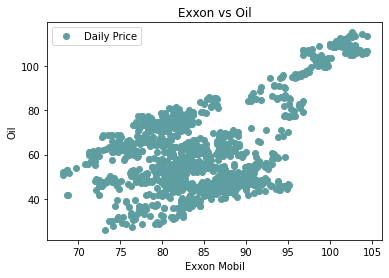

In [56]:
x = price_data['exxon_price']
y = price_data['oil_price']

plt.plot(x, y, 'o', color = 'cadetblue', label = "Daily Price")

plt.title('Exxon vs Oil')
plt.xlabel('Exxon Mobil')
plt.ylabel("Oil")
plt.legend()
plt.show()

In [57]:
price_data.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


In [58]:
price_data.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


array([[<AxesSubplot:title={'center':'exxon_price'}>,
        <AxesSubplot:title={'center':'oil_price'}>]], dtype=object)

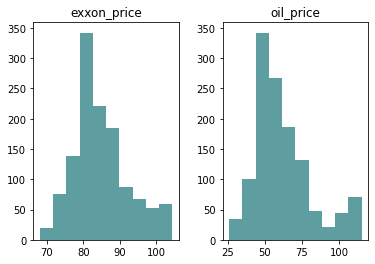

In [59]:
price_data.hist(grid = False, color = 'cadetblue')

In [60]:
exxon_kurtosis = kurtosis(price_data['exxon_price'], fisher = True)
oil_kurtosis = kurtosis(price_data['oil_price'], fisher = True)

exxon_skew = skew(price_data['exxon_price'])
oil_skew = skew(price_data['oil_price'])

display("Exxon Kurtosis: {:.2}".format(exxon_kurtosis))
display("Oil Kurtosis: {:.2}".format(oil_kurtosis))

display("Exxon Skew: {:.2}".format(exxon_skew))
display("Oil Skew: {:.2}".format(oil_skew))

'Exxon Kurtosis: 0.088'

'Oil Kurtosis: 0.53'

'Exxon Skew: 0.66'

'Oil Skew: 1.0'

In [61]:
display('Exxon')
display(stats.kurtosistest(price_data['exxon_price']))
display('oil')
display(stats.kurtosistest(price_data['oil_price']))

display('Exxon')
display(stats.skewtest(price_data['exxon_price']))
display('oil')
display(stats.skewtest(price_data['oil_price']))

'Exxon'

KurtosistestResult(statistic=0.7185349375030217, pvalue=0.47242751383320714)

'oil'

KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)

'Exxon'

SkewtestResult(statistic=8.770169400598549, pvalue=1.7839768456341654e-18)

'oil'

SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159925e-35)

In [66]:
# define our input variable (X) & output variable.
Y = price_data.drop('oil_price', axis = 1)
X = price_data[['oil_price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [67]:
# create a Linear Regression model object.
regression_model = LinearRegression()

# pass through the X_train & y_train data set.
regression_model.fit(X_train, y_train)


LinearRegression()

In [68]:
# let's grab the coefficient of our model and the intercept.
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))

The Coefficient for our model is 0.24
The intercept for our model is 70.01


In [69]:
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))

The predicted value is 85.95


In [70]:
y_predict = regression_model.predict(X_test)

y_predict[:5]

array([[82.23530265],
       [82.87451035],
       [81.48245802],
       [78.9256272 ],
       [84.01324704]])

In [71]:
X2 = sm.add_constant(X)

model = sm.OLS(Y, X2)

est = model.fit()

In [72]:
est.conf_int()

,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


In [73]:
est.pvalues

const         0.000000e+00
oil_price    1.423529e-123
dtype: float64

In [74]:
model_mse = mean_squared_error(y_test, y_predict)

model_mae = mean_absolute_error(y_test, y_predict)

model_rmse = math.sqrt(model_mse)

print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))


MSE 38.4
MAE 5.03
RMSE 6.2


In [75]:
model_r2 = r2_score(y_test, y_predict)
print("R2 {:.2}".format(model_r2))

R2 0.31


In [76]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            exxon_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.42e-123
Time:                        18:10:56   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

<function matplotlib.pyplot.show(close=None, block=None)>

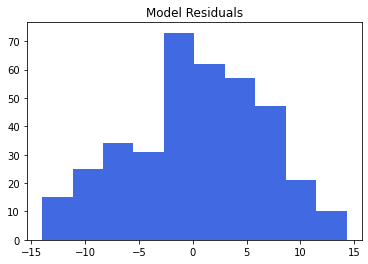

In [78]:
(y_test - y_predict).hist(grid = False, color = 'royalblue')
plt.title("Model Residuals")
plt.show

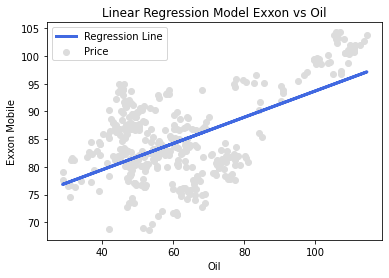

In [79]:
plt.scatter(X_test, y_test, color = "gainsboro", label = "Price")
plt.plot(X_test, y_predict, color = 'royalblue', linewidth = 3, linestyle = '-', label = "Regression Line")

plt.title("Linear Regression Model Exxon vs Oil")
plt.xlabel('Oil')
plt.ylabel('Exxon Mobile')
plt.legend()
plt.show()


In [80]:
import pickle

with open('my_linear_regression.sav', 'wb') as f:
    pickle.dump(regression_model, f)
    
with open('my_linear_regression.sav', 'rb') as f:
    regression_model_2 = pickle.load(f)
    
regression_model_2.predict([[67.33]])

array([[85.94980965]])